In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

C:\ProgramData\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [4]:
df=pd.read_csv('amazon.csv')
df.info()
df=df.iloc[:,1:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   int64  
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(2), int64(7), object(3)
memory usage: 460.9+ KB


In [5]:
df.head(10)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.000000
1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.000000
2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.000000
3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.000000
4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.000000
5,2Cents!,5,It's mini storage. It doesn't do anything els...,29-04-2013,588,0,0,0,0,0.0,0.000000
6,2K1Toaster,5,I have it in my phone and it never skips a bea...,19-10-2013,415,0,0,0,0,0.0,0.000000
7,"35-year Technology Consumer ""8-tracks to 802.11""",5,It's hard to believe how affordable digital ha...,07-10-2014,62,0,0,0,0,0.0,0.000000
8,4evryoung,5,Works in a HTC Rezound. Was running short of ...,24-03-2014,259,1,0,1,1,1.0,0.206549
9,53rdcard,5,"in my galaxy s4, super fast card, and am total...",10-11-2013,393,0,0,0,0,0.0,0.000000


In [6]:
df.isnull().any(axis=0)
df.dropna(inplace=True)

In [7]:
df.isnull().any(axis=0)

reviewerName            False
overall                 False
reviewText              False
reviewTime              False
day_diff                False
helpful_yes             False
helpful_no              False
total_vote              False
score_pos_neg_diff      False
score_average_rating    False
wilson_lower_bound      False
dtype: bool

In [8]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1


In [33]:
newdf=df.iloc[:,1:3]

In [34]:
newdf

,overall,reviewText
1,5,"Purchased this for my device, it worked as adv..."
2,4,it works as expected. I should have sprung for...
3,5,This think has worked out great.Had a diff. br...
4,5,"Bought it with Retail Packaging, arrived legit..."
5,5,It's mini storage. It doesn't do anything els...
...,...,...
4910,1,I bought this Sandisk 16GB Class 10 to use wit...
4911,5,Used this for extending the capabilities of my...
4912,5,Great card that is very fast and reliable. It ...
4913,5,Good amount of space for the stuff I want to d...


In [35]:
newdf['sentiment']=newdf['reviewText'].apply(lambda x: sentiment_score(x[:512]))

In [36]:
newdf

,overall,reviewText,sentiment
1,5,"Purchased this for my device, it worked as adv...",5
2,4,it works as expected. I should have sprung for...,3
3,5,This think has worked out great.Had a diff. br...,1
4,5,"Bought it with Retail Packaging, arrived legit...",5
5,5,It's mini storage. It doesn't do anything els...,3
...,...,...,...
4910,1,I bought this Sandisk 16GB Class 10 to use wit...,1
4911,5,Used this for extending the capabilities of my...,5
4912,5,Great card that is very fast and reliable. It ...,5
4913,5,Good amount of space for the stuff I want to d...,4


In [43]:
sqmean=np.power(newdf['overall']-newdf['sentiment'],2)
mse=np.mean(sqmean)
print(f"Mean Square Error: :{mse:.2f}")

Mean Square Error: :0.81


In [42]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(newdf['sentiment'], newdf['overall'])

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 68.25%


In [38]:
df1=pd.DataFrame(newdf['sentiment'].value_counts())
df2=pd.DataFrame(newdf['overall'].value_counts())
print("Calculated sentiment: ")
display(df1)
print("Actual sentiment: ")
display(df2)

Calculated sentiment: 


,sentiment
5,3117
4,996
1,308
3,265
2,227


Actual sentiment: 


,overall
5,3921
4,526
1,244
3,142
2,80


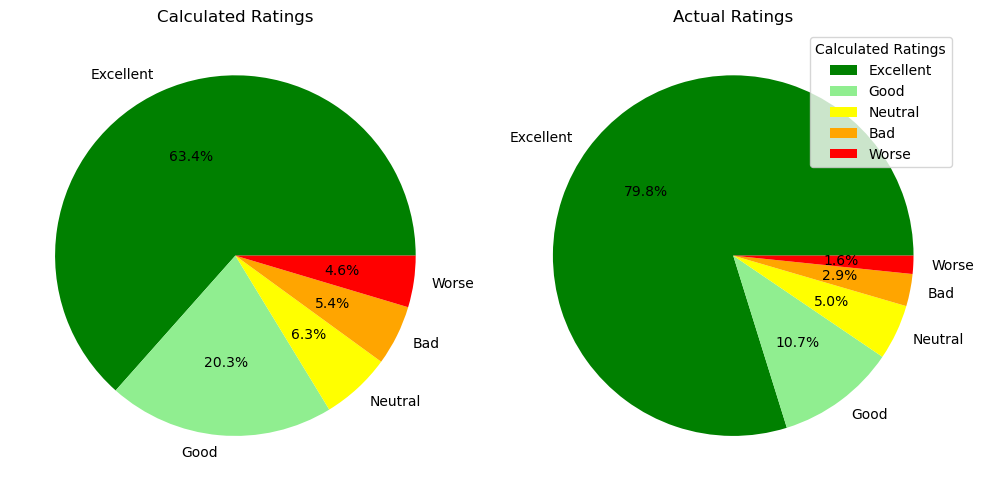

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(10, 7))
X1=df1['sentiment']
X2=df2['overall']
labels=['Excellent','Good','Neutral','Bad','Worse']
colors=['green','lightgreen','yellow','orange','red']
axs[0].pie(X1, labels=labels,colors=colors, autopct='%1.1f%%')
axs[0].set_title('Calculated Ratings')

axs[1].pie(X2, labels=labels,colors=colors, autopct='%1.1f%%')
axs[1].set_title('Actual Ratings')
plt.legend(title="Calculated Ratings")
plt.tight_layout()
plt.show()